In [ ]:
import sys
sys.path.append('..')

import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

from BayesianOptimize import BayesianOptimizer, print_best_params
import optuna
import numpy as np
import time

def format_elapsed_time(start_time, end_time):
    elapsed_time = end_time - start_time
    hours = int(elapsed_time // 3600)
    minutes = int((elapsed_time % 3600) // 60)
    seconds = elapsed_time % 60
    if hours > 0:
        return f"{hours}小时{minutes}分钟{seconds:.2f}秒"
    elif minutes > 0:
        return f"{minutes}分钟{seconds:.2f}秒"
    else:
        return f"{seconds:.2f}秒"

# # 单线程模式（用于测试GPU使用情况）
# print("\n测试单线程模式以检查GPU使用情况...")
# optimizer_single = BayesianOptimizer(n_calls=5, random_state=42, fast_eval=True, n_jobs=1)

# # 执行优化
# best_params_single, best_reward_single = optimizer_single.optimize()

# print(f"\n单线程测试完成!")
# print(f"最佳平均奖励: {best_reward_single:.2f}")
# print_best_params(best_params_single)

# 多线程并行优化
start_time = time.time()
print("\n启用多线程并行优化...")
optimizer = BayesianOptimizer(n_calls=30, random_state=42, fast_eval=True, n_jobs=30)

# 执行优化
best_params, best_reward = optimizer.optimize()

end_time = time.time()
print(f"\n优化完成!总耗时：{format_elapsed_time(start_time, end_time)}")
print(f"最佳平均奖励: {best_reward:.2f}")
print_best_params(best_params)

initializing ocelot...
Using device: cuda
试验 1 使用 100 回合训练
试验 2 使用 100 回合训练
试验 3 使用 100 回合训练
试验 4 使用 100 回合训练
试验 5 使用 100 回合训练
试验 6 使用 100 回合训练
试验 7 使用 100 回合训练
试验 8 使用 100 回合训练
试验 9 使用 100 回合训练
试验 10 使用 300 回合训练
试验 11 使用 300 回合训练
试验 12 使用 300 回合训练
试验 13 使用 300 回合训练
试验 14 使用 300 回合训练
试验 15 使用 300 回合训练
试验 16 使用 300 回合训练
试验 17 使用 300 回合训练
试验 18 使用 300 回合训练
试验 19 使用 300 回合训练
试验 20 使用 300 回合训练
试验 21 使用 300 回合训练
试验 22 使用 300 回合训练
试验 23 使用 300 回合训练
试验 24 使用 300 回合训练
试验 25 使用 500 回合训练
试验 26 使用 500 回合训练
试验 27 使用 500 回合训练
试验 28 使用 500 回合训练
试验 29 使用 500 回合训练
试验 30 使用 500 回合训练


/home/accelerator/miniconda3/envs/acc/lib/python3.10/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
TD3Agent using device: cuda
Agent device info - Actor: cuda:0, Critic1: cuda:0
Training on device: cuda
开始训练TD3智能体...
Episode  Steps    Reward       Final Error  Completed  GPU Mem   
----

In [2]:
from td3_agent import create_env_and_agent, train_td3_agent, HYPERPARAMS

# 更新超参数
hyperparams = HYPERPARAMS.copy()
hyperparams['reward_weights'] = hyperparams['reward_weights'].copy()
hyperparams['reward_weights']['orbit_improvement'] = best_params['orbit_improvement_weight']
hyperparams['reward_weights']['action_penalty'] = best_params['action_penalty_weight']
hyperparams['reward_weights']['completion_bonus'] = best_params['completion_bonus']
hyperparams['policy_noise'] = best_params['policy_noise']
hyperparams['noise_clip'] = best_params['noise_clip']
hyperparams['actor_lr'] = best_params['actor_lr']
hyperparams['critic_lr'] = best_params['critic_lr']
hyperparams['gamma'] = best_params['gamma']
hyperparams['tau'] = best_params['tau']

# 设置训练回合数
hyperparams['max_episodes'] = 1000  # 使用完整训练

print("使用最优超参数:")
print_best_params(best_params)

# 创建环境和智能体
env, agent = create_env_and_agent()

# 训练智能体
print("\n开始使用最优超参数训练TD3智能体...")
episode_rewards, completion_rates = train_td3_agent(env, agent, hyperparams)

# 测试训练结果
print("\n训练完成! 开始测试智能体性能...")

使用最优超参数:
最佳超参数:
orbit_improvement_weight: 0.531566
action_penalty_weight: 0.190243
completion_bonus: 78.925212
policy_noise: 0.397547
noise_clip: 0.429637
actor_lr: 0.000048
critic_lr: 0.000050
gamma: 0.971870
tau: 0.033432
TD3Agent using device: cuda

开始使用最优超参数训练TD3智能体...
Training on device: cuda
开始训练TD3智能体...
Episode  Steps    Reward       Final Error  Completed  GPU Mem   
--------------------------------------------------------------------------------


/home/accelerator/miniconda3/envs/acc/lib/python3.10/site-packages/gym/spaces/box.py:127: UserWarning: WARN: Box bound precision lowered by casting to float32
  logger.warn(f"Box bound precision lowered by casting to {self.dtype}")


0        200      227.10       inf          No         0.25GB    
10       200      214.35       inf          No         0.25GB    
20       200      420.45       inf          No         0.25GB    
30       200      261.00       inf          No         0.25GB    
40       200      270.55       inf          No         0.25GB    
50       200      225.89       inf          No         0.25GB    
60       200      249.15       inf          No         0.25GB    
70       200      287.77       inf          No         0.25GB    
80       200      384.36       inf          No         0.25GB    
90       200      496.26       inf          No         0.25GB    
连续100回合未能完成任务，提前停止训练
训练完成!
总训练时间: 347.62 秒
平均奖励: 323.24
完成率: 0.00%
峰值GPU内存使用: 0.31 GB

训练完成! 开始测试智能体性能...


测试回合 1: 奖励 = 526.94, 完成 = 否, 步数 = 200
测试回合 2: 奖励 = 526.94, 完成 = 否, 步数 = 200
测试回合 3: 奖励 = 526.94, 完成 = 否, 步数 = 200
测试回合 4: 奖励 = 526.94, 完成 = 否, 步数 = 200
测试回合 5: 奖励 = 526.94, 完成 = 否, 步数 = 200
测试回合 6: 奖励 = 521.94, 完成 = 否, 步数 = 200
测试回合 7: 奖励 = 521.94, 完成 = 否, 步数 = 200
测试回合 8: 奖励 = 521.93, 完成 = 否, 步数 = 200
测试回合 9: 奖励 = 521.93, 完成 = 否, 步数 = 200
测试回合 10: 奖励 = 521.93, 完成 = 否, 步数 = 200

测试结果统计:
平均奖励: 524.44 ± 2.50
完成率: 0.00%


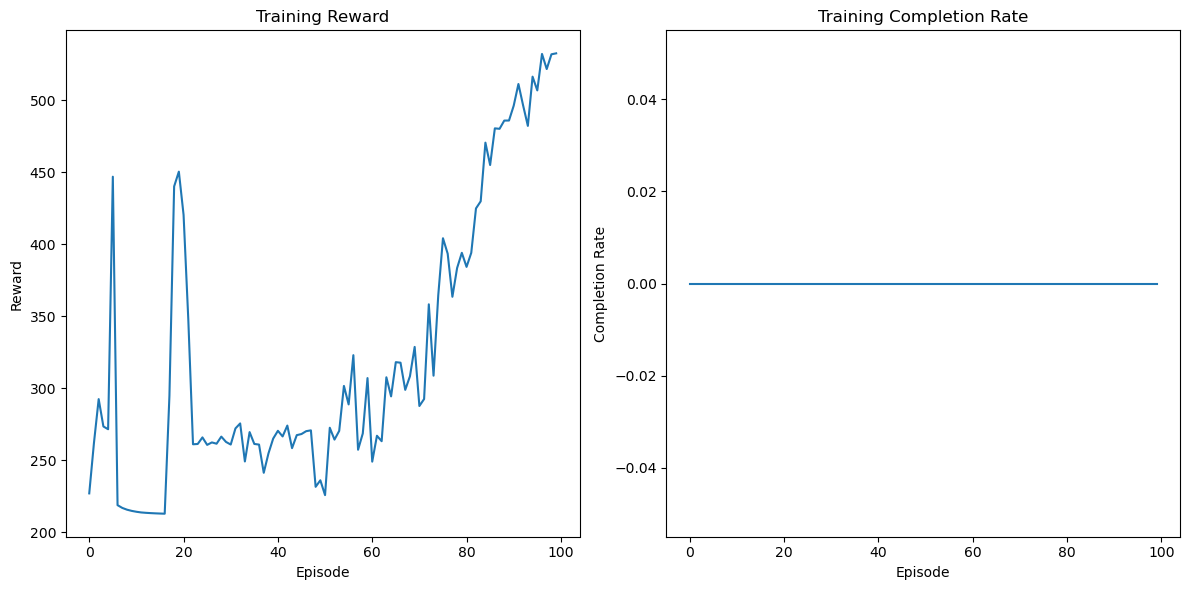

In [3]:
import matplotlib.pyplot as plt
# 多次测试以评估性能
test_episodes = 10
test_rewards = []
test_completions = []

for episode in range(test_episodes):
    state = env.reset()
    episode_reward = 0
    done = False
    steps = 0
    
    while not done and steps < hyperparams['max_steps_per_episode']:
        # 使用评估模式选择动作
        action = agent.select_action(state, evaluate=True)
        state, reward, done, info = env.step(action)
        episode_reward += reward
        steps += 1
    
    test_rewards.append(episode_reward)
    test_completions.append(info.get('completed', False))
    
    print(f"测试回合 {episode+1}: 奖励 = {episode_reward:.2f}, 完成 = {'是' if info.get('completed', False) else '否'}, 步数 = {steps}")

# 输出测试结果统计
print("\n测试结果统计:")
print(f"平均奖励: {np.mean(test_rewards):.2f} ± {np.std(test_rewards):.2f}")
print(f"完成率: {np.mean(test_completions)*100:.2f}%")

# 保存模型
# import torch
# torch.save(agent.actor.state_dict(), 'best_td3_actor.pth')
# torch.save(agent.critic_1.state_dict(), 'best_td3_critic1.pth')
# torch.save(agent.critic_2.state_dict(), 'best_td3_critic2.pth')
# print("\n模型已保存为 best_td3_actor.pth, best_td3_critic1.pth, best_td3_critic2.pth")

# 绘制训练过程中的奖励变化
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Training Reward')

plt.subplot(1, 2, 2)
plt.plot(completion_rates)
plt.xlabel('Episode')
plt.ylabel('Completion Rate')
plt.title('Training Completion Rate')

plt.tight_layout()
plt.show()

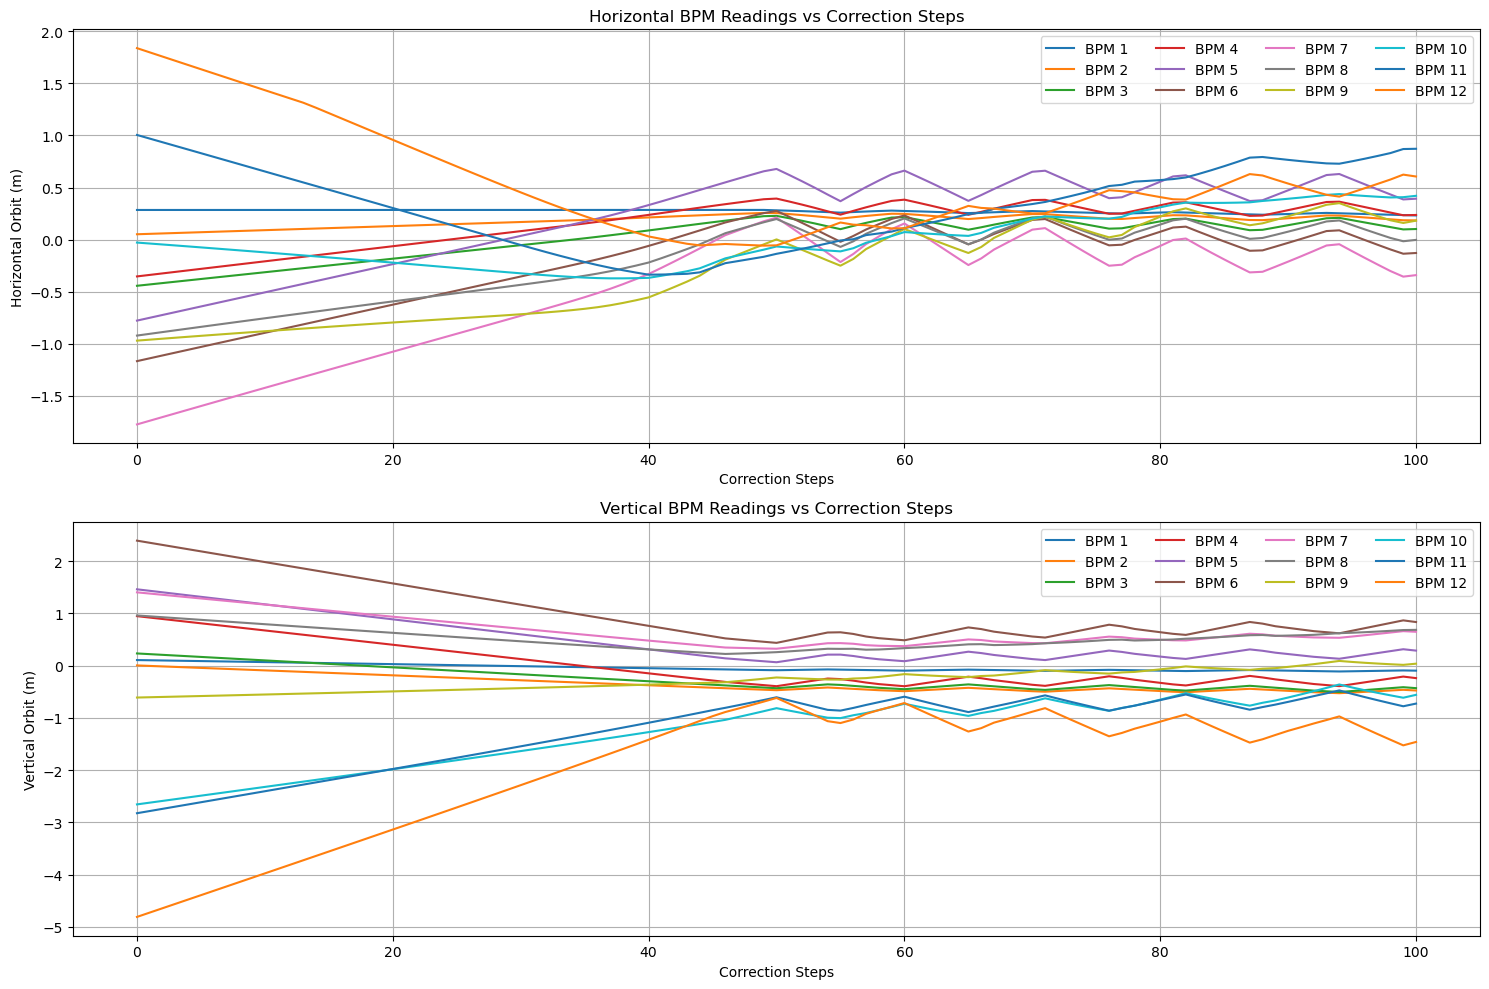

Initial horizontal orbit error: 8.01e-01 m
Final horizontal orbit error: 3.08e-01 m
Initial vertical orbit error: 1.53e+00 m
Final vertical orbit error: 5.40e-01 m
Horizontal improvement ratio: 2.60x
Vertical improvement ratio: 2.84x


In [4]:
# 分析校正前后的轨道差异
def analyze_correction_effect(env, agent):
    # 获取初始轨道
    initial_state = env.reset()
    initial_orbit_x = initial_state[:12]  # 前12个元素是水平BPM读数
    initial_orbit_y = initial_state[12:24]  # 接下来12个元素是垂直BPM读数
    
    # 运行100次校正过程
    state = initial_state.copy()
    orbit_history_x = [initial_orbit_x.copy()]
    orbit_history_y = [initial_orbit_y.copy()]
    
    for step in range(100):  # 执行100步校正
        action = agent.select_action(state, evaluate=True)
        state, reward, done, info = env.step(action)
        current_orbit_x = state[:12]
        current_orbit_y = state[12:24]
        orbit_history_x.append(current_orbit_x.copy())
        orbit_history_y.append(current_orbit_y.copy())
        
        # 不检查done，继续执行100步
    
    # 转换为numpy数组便于分析
    orbit_history_x = np.array(orbit_history_x)
    orbit_history_y = np.array(orbit_history_y)
    
    # 绘制轨道变化
    plt.figure(figsize=(15, 10))
    
    # 水平轨道
    plt.subplot(2, 1, 1)
    for i in range(12):
        plt.plot(orbit_history_x[:, i], label=f'BPM {i+1}')
    plt.xlabel('Correction Steps')
    plt.ylabel('Horizontal Orbit (m)')
    plt.title('Horizontal BPM Readings vs Correction Steps')
    plt.grid(True)
    plt.legend(loc='upper right', ncol=4)
    
    # 垂直轨道
    plt.subplot(2, 1, 2)
    for i in range(12):
        plt.plot(orbit_history_y[:, i], label=f'BPM {i+1}')
    plt.xlabel('Correction Steps')
    plt.ylabel('Vertical Orbit (m)')
    plt.title('Vertical BPM Readings vs Correction Steps')
    plt.grid(True)
    plt.legend(loc='upper right', ncol=4)
    
    plt.tight_layout()
    plt.show()
    
    # 打印统计信息
    print(f"Initial horizontal orbit error: {np.mean(np.abs(initial_orbit_x)):.2e} m")
    print(f"Final horizontal orbit error: {np.mean(np.abs(orbit_history_x[-1])):.2e} m")
    print(f"Initial vertical orbit error: {np.mean(np.abs(initial_orbit_y)):.2e} m")
    print(f"Final vertical orbit error: {np.mean(np.abs(orbit_history_y[-1])):.2e} m")
    
    if np.mean(np.abs(orbit_history_x[-1])) > 0:
        h_improvement = np.mean(np.abs(initial_orbit_x))/np.mean(np.abs(orbit_history_x[-1]))
        print(f"Horizontal improvement ratio: {h_improvement:.2f}x")
    
    if np.mean(np.abs(orbit_history_y[-1])) > 0:
        v_improvement = np.mean(np.abs(initial_orbit_y))/np.mean(np.abs(orbit_history_y[-1]))
        print(f"Vertical improvement ratio: {v_improvement:.2f}x")

# 运行分析
analyze_correction_effect(env, agent)